In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.shape

(25, 2)

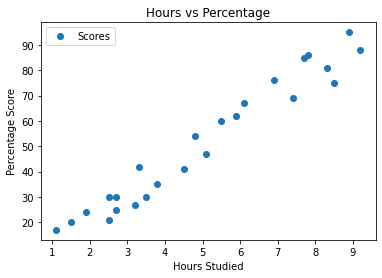

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From above grap we can see that it is postive **Linear Regression**

**Preparing the data for  Training and Test split**

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.20, random_state=43)

In [15]:
X_train.shape

(20, 1)

In [16]:
X_test.shape

(5, 1)

In [17]:
from sklearn.linear_model import LinearRegression  
model=LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# ploting the regression line
# Y=mx+c

In [18]:
line=model.coef_*X+model.intercept_
line

array([[25.9848136 ],
       [51.32083309],
       [32.80604962],
       [84.45255089],
       [35.72943648],
       [16.24019072],
       [91.27378691],
       [55.21868225],
       [82.50362632],
       [27.93373818],
       [76.65685259],
       [59.1165314 ],
       [45.47405936],
       [33.78051191],
       [12.34234156],
       [88.35040005],
       [25.9848136 ],
       [20.13803987],
       [61.06545598],
       [73.73346572],
       [27.93373818],
       [48.39744623],
       [38.65282335],
       [68.86115428],
       [77.63131488]])

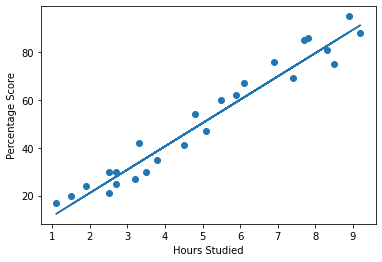

In [19]:
# ploting the Line

plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

**Now that we have trained our algorithm, it's time to make some predictions**

In [29]:
y_pred=model.predict(X_test)

In [25]:
df=pd.DataFrame({"Predict":y_pred, "Actual":y_test})
df

,Predict,Actual
0,91.273787,88
1,76.656853,85
2,16.240191,20
3,33.780512,42
4,77.631315,86


In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
np.mean(scores)

0.9180771341891051

In [27]:
from sklearn import metrics  
metrics.r2_score(y_test,y_pred)

0.9408139077290574

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.392983364991654


In [50]:
score = model.predict([[9.25]])
score
print(" predicted score if a student studies for 9.25 hrs/ day is {}".format(score))

 predicted score if a student studies for 9.25 hrs/ day is [91.76101805]
